# Discrete Signals

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Standard Signals

A discrete signal $x[k] \in \mathbb{C}$ is a sequence of values that depends on the discrete index $k \in \mathbb{Z}$. It may have been derived by [sampling](../sampling/ideal.ipynb) $x[k] := x(k T)$ from a continuous signal $x(t)$. As for the case of continuous signals, certain [standard signals](../continuous_signals/standard_signals.ipynb) play an important role in the theory and practical application of discrete signals and systems. These standard signals are introduced and illustrated in the following. Some of the signals are derived by sampling their continuous counterparts, some of them by postulating equivalent properties. Discrete signals are commonly denoted by using square brackets for their arguments.

### Complex Exponential Signal

The discrete complex exponential signal is defined by the [complex exponential function](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x[k] = e^{(\Sigma + j \Omega) \, k} = z^k
\end{equation}

where $z = e^{\Sigma + j \Omega}$ denotes the complex frequency $z \in \mathbb{C}$ with $\Sigma, \Omega \in \mathbb{R}$. The discrete complex exponential signal can be related to the [continuous complex exponential signal](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $x(t) = e^{(\sigma + j \omega) t}$ by sampling

\begin{equation}
x[k] = x(k T) = e^{(\sigma + j \omega) k T} = e^{( \sigma T + j \omega T ) k}
\end{equation}

where $T$ denotes the sampling interval. Comparison to above definition of the discrete signal reveals that $\Sigma = \sigma T$ and $\Omega = \omega T$. Due to this relation, the latter is termed as *normalized frequency* $\Omega$. Using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula), the definition of the complex exponential signal can be reformulated as

\begin{equation}
x[k] = e^{\Sigma k} \cos[\Omega k] + j e^{\Sigma k} \sin[\Omega k]
\end{equation}

The real/imaginary part of the exponential signal is given by a weighted discrete cosine/sine with normalized frequency $\Omega$. The normalized frequency $\Omega$ is ambiguous due to the periodicity of the cosine/sine function for discrete $k$. For instance

\begin{equation}
\cos[\Omega k] = \cos[(\Omega + n \cdot 2 \pi) \cdot k]
\end{equation}

with $n \in \mathbb{Z}$. It can be concluded that the normalized frequency $\Omega$ is unique for $-\pi < \Omega < \pi$. This also becomes evident when considering the sampling of a continuous exponential signal, as shown above. For [critical sampling](../sampling/ideal.ipynb#Sampling-Theorem-for-Low-Pass-Signals) the sampling frequency $\omega_\text{s} = 2 \cdot \omega$. From $T = \frac{2 \pi}{\omega_\text{s}}$ follows $\Omega = \omega T = \pi$. It can be concluded that the normalized frequency $\Omega = \pm \pi$ represents the highest/lowest normalized frequency a sampled signal can represent.

The complex exponential function is only periodic with respect to the discrete index $k$, if

\begin{equation}
x[k] = x[k + n \cdot N_\text{p}]
\end{equation}

holds for $n \in \mathbb{Z}$ and $N_\text{p} \in \mathbb{N}$. The periodicity of the complex exponential function is given as

\begin{equation}
N_\text{p} = \frac{2 \pi}{\Omega}
\end{equation}

It follows from the requirement $N_\text{p} \in \mathbb{N}$ for a periodic sequence, that not all normalized frequencies $\Omega$ result in a periodic discrete complex exponential signal. Only $\Omega = \frac{2 \pi}{N_\text{p}}$ with $N_\text{p} \in \mathbb{N}$ is periodic with period $N_\text{p}$. Sampling of a continuous complex exponential signal may result in an aperiodic discrete complex exponential signal.

The complex exponential signal can be expressed in terms of its magnitude and phase

\begin{equation}
x[k] = z^k = |z|^k \cdot e^{j \varphi(z) k}
\end{equation}

where by comparison with its definition $|z| = |e^\Sigma|$ and $\varphi(z) = \Omega$. This finding allows an interpretation of the complex frequency $z$. Its phase $\varphi(z)$ is equal to the normalized frequency $\Omega$ of its harmonic part $e^{j \Omega k}$. This is weighted by the magnitude $|z|^k$. With increasing index $k >0$, the magnitude of the complex exponential signal is

* exponentially decaying for $|z| < 1$ ($\Sigma < 0$)
* constantly one for $|z| = 1$ ($\Sigma = 0$)
* exponentially growing for $|z| > 1$ ($\Sigma > 0$).

**Example**

This example illustrates the discrete complex exponential signal and its parameters. The Python module [NumPy](http://www.numpy.org/) provides functionality for numerical mathematics. In discrete signal processing it is common  to define discrete signals as vectors holding the values $x[k]$ for a given set of indexes $k$. Two functions are defined as prerequisite. One for the generation of the exponential signal and one to plot its real and imaginary part.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def exponential_signal(k, Sigma, Omega):
    return np.exp((Sigma + 1j * Omega) * k)


def plot_signal(k, x):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.stem(k, np.real(x))
    plt.xlabel('$k$')
    plt.ylabel(r'$\Re \{ x[k] \}$')

    plt.subplot(122)
    plt.stem(k, np.imag(x))
    plt.xlabel('$k$')
    plt.ylabel(r'$\Im \{ x[k] \}$')
    plt.tight_layout()

The vector `x` is populated by the samples of the exponential signal for a given set of indexes $k$, $\Sigma = 0.025$ and $\Omega = 0.5$. Its first ten values are printed for illustration.

In [2]:
k = np.arange(31)
x = exponential_signal(k, 0.025, 0.5)
x[:10]

array([ 1.        +0.j        ,  0.89979867+0.49156225j,
        0.5680042 +0.88461412j,  0.07624651+1.07518404j,
       -0.45991338+1.00492907j, -0.90781465+0.67815778j,
       -1.15020718+0.16395806j, -1.11555049-0.41786919j,
       -0.79836212-0.92436066j, -0.26398437-1.22418317j])

Discrete signals are commonly visualized by '*stem*'-plots. The Python module [`matplotlib`](http://matplotlib.org/) is used for this purpose. The real and imaginary part of the complex exponential signal is shown by the left and right plot, respectively.

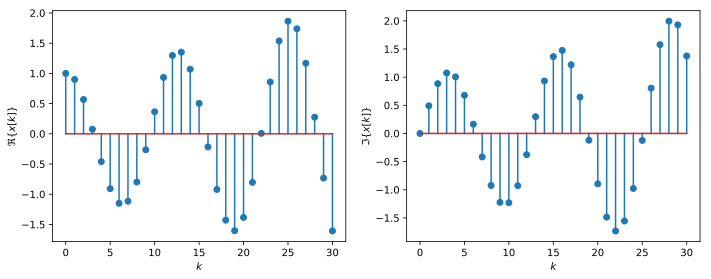

In [3]:
plot_signal(k, x)

Now the case of an aperiodic harmonic exponential signal with $N_\text{p} \notin \mathbb{N}$ is illustrated for $\Sigma = 0$. Again the left and right plot show the real and imaginary part.

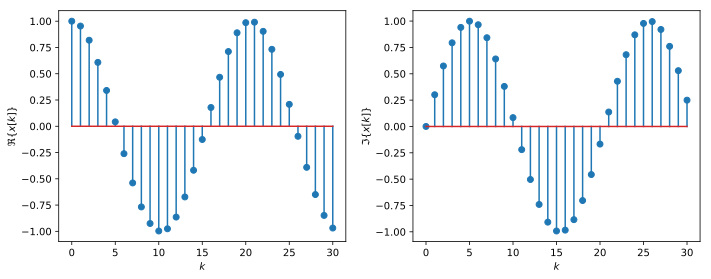

In [4]:
Np = 20.55
x = exponential_signal(k, 0, 2 * np.pi / Np)
plot_signal(k, x)

**Exercise**

* Change the values of $\Sigma$ in the first example in order to create a signal with increasing/constant/decaying amplitude.
* Check if the stated non-uniqueness of the normalized frequency $\Omega$ holds by adding multiples of $2 \pi$ and plotting the resulting signal.

### Dirac Impulse

The discrete Dirac impulse $\delta[k]$ cannot be derived by sampling from its [continuous counterpart](../continuous_signals/standard_signals.ipynb#Dirac-Impulse), since the [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function) is a distribution and not a function in the conventional sense. The discrete Dirac impulse is defined as

\begin{equation}
\delta[k] = \begin{cases}
1 & \text{for } k = 0 \\
0 & \text{otherwise}
\end{cases}
\end{equation}

This function is also known as [*Kronecker delta*](https://en.wikipedia.org/wiki/Kronecker_delta), the signal as *impulse sequence* or *unit impulse*. The discrete Dirac impulse $\delta[k]$ maintains the essential properties of its continuous counterpart $\delta(t)$. In particular

1. **Sifting property**
    \begin{equation}
    \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \delta[k - \kappa] = x[k]
    \end{equation}
    The sifting property implies $\sum_{\kappa = -\infty}^{\infty} x[\kappa] = 1$.
    
2. **Multiplication**
    \begin{equation}
    x[k] \cdot \delta[k - \kappa] = x[\kappa] \cdot \delta[k - \kappa]
    \end{equation}
    
3. **Linearity**
    \begin{equation}
    a \cdot \delta[k] + b \cdot \delta[k] = (a+b) \cdot \delta[k]
    \end{equation}

The discrete Dirac impulse is an important signal in the theory of signals and systems. It is used for instance for the characterization of discrete LTI systems by their impulse response.

**Example**

The properties of the discrete Dirac impulse are illustrated. First a function is defined for the discrete Dirac impulse and $\delta[k]$ is plotted

(-0.1, 1.1)

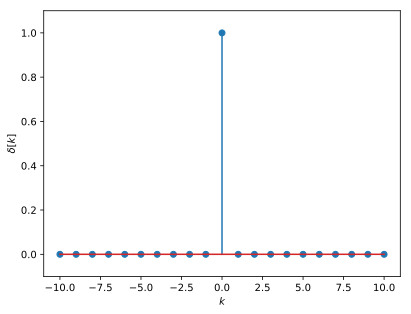

In [5]:
def dirac(k):
    return np.where(k == 0, 1.0, 0.0)


k = np.arange(-10, 11)
x = dirac(k)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$\delta[k]$')
plt.ylim([-0.1, 1.1])

Now let's check the multiplication property by defining a cosine signal $y[k] = \cos[k]$ and computing the signal $w[k] = y[k] \cdot \delta[k-6]$

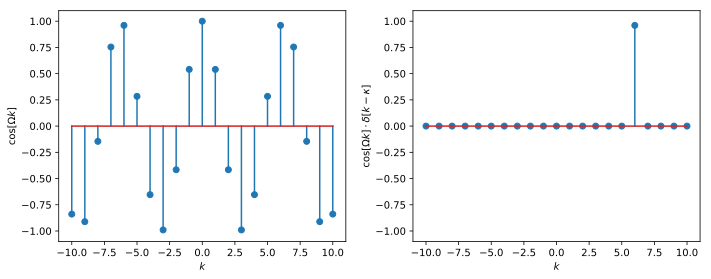

In [6]:
x = dirac(k - 6)
y = np.cos(k)
w = x*y

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel(r'$\cos[\Omega k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(122)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$\cos[\Omega k] \cdot \delta[k - \kappa]$')
plt.ylim([-1.1, 1.1])
plt.tight_layout()

### Heaviside Signal

The discrete Heaviside signal is defined similar to its [continuous Heaviside signal](../continuous_signals/standard_signals.ipynb#Heaviside-Signal) as

\begin{equation}
\epsilon[k] = \begin{cases} 1 & k \geq 0 \\  0 & k < 0 \end{cases}
\end{equation}

The Heaviside signal is used to represent a signal that switches on at a specified time and stays on indefinitely. The Heaviside signal can be related to the Dirac impulse by

\begin{equation}
\epsilon[k] = \sum_{\kappa = -\infty}^{k} \delta[\kappa]
\end{equation}

The Dirac impulse can be expressed in terms of the Heaviside signal

\begin{equation}
\delta[k] = \epsilon[k] - \epsilon[k-1]
\end{equation}

**Example**

In the following, a function is defined for the Heaviside signal $\epsilon[k]$ and the signal is plotted for illustration.

(-0.1, 1.1)

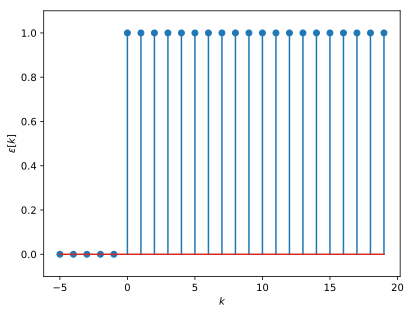

In [7]:
def heaviside(k):
    return np.where(k >= 0, 1.0, 0.0)


k = np.arange(-5, 20)
x = heaviside(k)

plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$\epsilon[k]$')
plt.ylim([-0.1, 1.1])

### Rectangular Signal

The discrete rectangular signal is defined as

\begin{equation}
\text{rect}_N[k] = \begin{cases} 1 & \text{for } 0 \leq k < N \\ 0 & \text{otherwise}  \end{cases}
\end{equation}

where $N \in \mathbb{N}$ denotes the number of its non-zero samples. Note that the discrete rectangular signal is not even symmetric as the [continuous rectangular signal](../continuous_signals/standard_signals.ipynb#Rectangular-Signal). The rectangular signal is used to represent signals which are non-zero for a limited period of time. The rectangular signal can be related to the Heaviside signal by

\begin{equation}
\text{rect}[k] = \epsilon[k] - \epsilon[k - N]
\end{equation}

**Example**

A function is defined for the rectangular signal and $\text{rect}_5[k]$ is plotted for illustration.

(-0.1, 1.1)

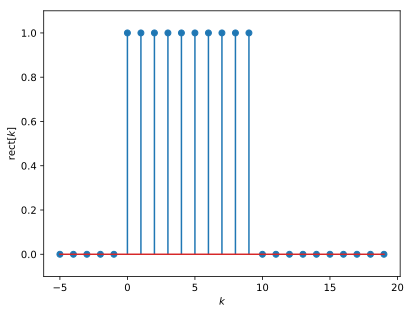

In [8]:
def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)


k = np.arange(-5, 20)
x = rect(k, 10)

plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$\mathrm{rect}[k]$')
plt.ylim([-0.1, 1.1])

**Exercise**

* Use $\text{rect}_N[t]$ to construct a cosine signal $x[k] = \cos[\Omega k] \cdot \text{rect}_N[t]$ of one period length with $\Omega= \frac{2 \pi}{10}$.

### Sign Signal

The discrete sign signal is defined analogously to the [continuous sign signal](../continuous_signals/standard_signals.ipynb#Sign-Signal) as

\begin{equation}
\text{sgn}[k] = \begin{cases} 1 & k>0 \\ 0 & k=0 \\ -1 & k < 0  \end{cases}
\end{equation}

The sign signal is used to represent the absolute value of a signal $x[k]$ as

\begin{equation}
|x[k]| = x[k] \cdot \text{sgn}(x[k])
\end{equation}

It is related to the Heaviside signal by

\begin{equation}
\text{sgn}[k] = \epsilon[k] - \epsilon[-k]
\end{equation}

**Example**

The sign signal is realized by using the [`numpy.sign`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html#numpy.sign) function. It is plotted for illustration.

(-1.1, 1.1)

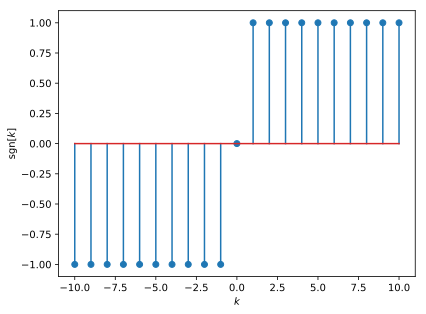

In [9]:
k = np.arange(-10, 11)
x = np.sign(k)

plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$\mathrm{sgn}[k]$')
plt.ylim([-1.1, 1.1])

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.